In [166]:
import numpy as np
import scipy
import csv
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import pandas as pd
from random import randint
from sympy import *
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')
%store -r parabdata

Conversione dei dati dal csv

In [167]:
data = csv.reader(open(parabdata[0], 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
    lyerrcol.append(row[2])
    
#Converto in array
xxdata = np.asarray(lxcol, dtype=np.float64)
yydata = np.asarray(lycol, dtype=np.float64)
yerr = np.asarray(lyerrcol, dtype=np.float64)
npoint=len(xxdata)

Calcolo delle derivate di X^2

In [168]:
s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
s_aa = diff(s,aa)
s_cc = diff(s,cc)

$a$, $b$ and $c$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2}\\
\sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2} & \sum_i \frac{x_i^4}{\sigma_i^2}\\
\end{bmatrix}$
$\begin{bmatrix} a\\b\\c \end{bmatrix}$ = 
$\begin{bmatrix} 
\sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\\\sum_i \frac{x_i^2 y_i}{\sigma_i^2}
\end{bmatrix}$
In forma matriciale : DA = B quindi A = D^(-1)B

In [169]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xxdata/yerrSq).sum()
sum_x2_over_yerrSq = (xxdata*xxdata/yerrSq).sum()
sum_x3_over_yerrSq = (xxdata*xxdata*xxdata/yerrSq).sum()
sum_x4_over_yerrSq = (xxdata*xxdata*xxdata*xxdata/yerrSq).sum()
sum_y_over_yerrSq = (yydata/yerrSq).sum()
sum_xy_over_yerrSq = (xxdata*yydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xxdata*xxdata*yydata/yerrSq).sum()

Calcolo matrice D e matrice inversa

In [170]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
matD_inv = np.linalg.inv(matD)
matD
matD_inv

array([[ 1.78063241e-02, -5.81027668e-04,  3.95256917e-06],
       [-5.81027668e-04,  2.41945880e-05, -1.82426269e-07],
       [ 3.95256917e-06, -1.82426269e-07,  1.45941016e-09]])

Check D^(-1)D = I

In [171]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -6.58679976e-18, -6.08596281e-19],
       [-5.61135753e-14,  1.00000000e+00, -1.23919138e-17],
       [ 1.11076062e-11,  1.95011363e-13,  1.00000000e+00]])

Calcolo matrice B

In [172]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
matB

array([1.63125000e+04, 9.55262500e+05, 7.49435625e+07])

In [173]:
np.dot(matD_inv,matB)

array([ 3.16513340e+01, -3.75057160e-02, -4.15293402e-04])

Calcolo parametri fit

In [174]:
a, b, c = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1],np.dot(matD_inv,matB)[2]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)

 a =  31.65133399209475
 b =  -0.037505716023103375
 c =  -0.0004152934022499666


In [175]:
vara, varb, varc= matD_inv[0,0], matD_inv[1,1], matD_inv[2,2]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)

 errore su a =  0.13344033914327386
 errore su b =  0.0049187994491212035
 errore su c =  3.82022270955809e-05


Plot e salvataggio immagine

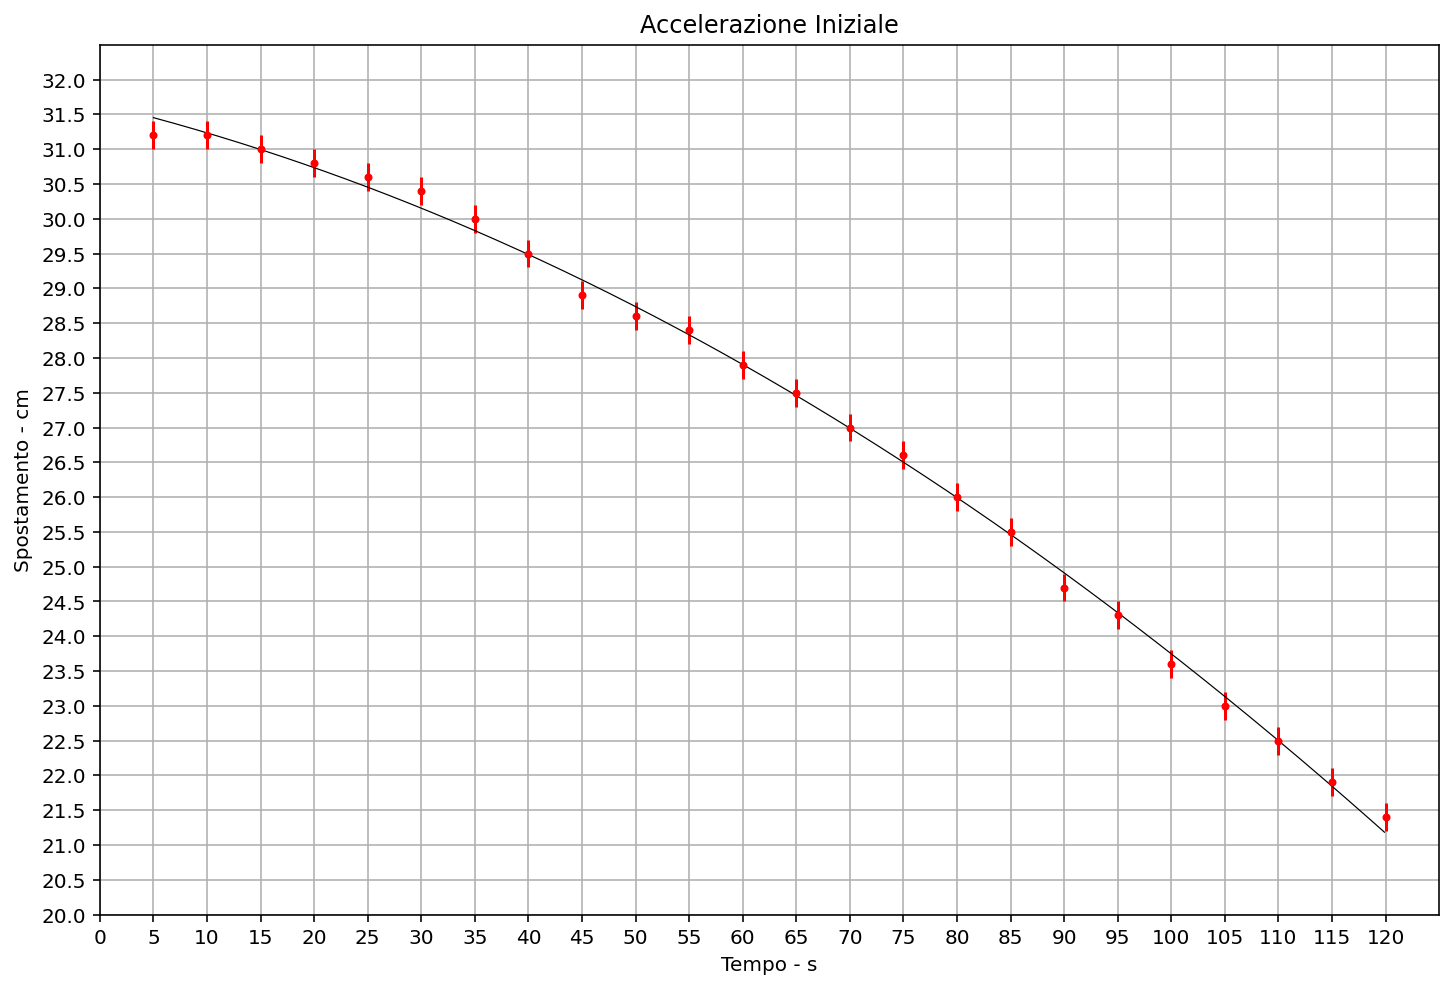

In [176]:
randfig=str(randint(0, 9999));
namefig='fig'+randfig+'.png';

plt.rcParams["figure.figsize"]=[12,8]
fig, ax = plt.subplots()
thickxdata = np.arange(5,120,0.1)
ax.set_xlabel(parabdata[1])
ax.set_ylabel(parabdata[2])
ax.set_title(parabdata[3])
ax.set_xlim(0, 125);
ax.set_ylim(20, 32.5);
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a,color="k",linewidth=0.6)
plt.errorbar(xxdata,yydata,yerr=yerr,fmt='r.')
plt.grid(which='both')
plt.xticks(np.arange(0,125,step=5));
plt.yticks(np.arange(20,32.5,step=0.5));

plt.savefig(namefig);

Calcolo X^2 e errore standard della stima

In [177]:
scarto1 = (yydata-a-b*xxdata-c*xxdata*xxdata)/yerr
scarto2 = (yydata-a-b*xxdata-c*xxdata*xxdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-3)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  10.23535383095164
 errore standard della stima =  0.13962776249355108


Calcolo coefficiente di determinazione

In [178]:
sum_y = (yydata).sum()
ymean=sum_y/npoint
ameany = yydata-ymean
vary = (ameany*ameany).sum()
yatteso =a+b*xxdata+c*xxdata*xxdata
scarto3=yatteso-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9991285495107556


In [182]:
#CSV Fit
#First column merging with um
aatext='Parametro a'
print(aatext)
abtext='Parametro b'
print(abtext)
actext='Parametro c'
print(actext)
erratext='Errore su a'
print(erratext)
errbtext='Errore su b'
print(errbtext)
errctext='Errore su c'
print(errctext)
determtext='Coeff. di determinaz.'
print(errctext)
#Creating Arrays
corrhead = np.array(['Variabile','Valore'])

aa = np.array([aatext,a])
ab = np.array([abtext,b])
ac = np.array([actext,c])
aerra = np.array([erratext,erra])
aerrb = np.array([errbtext,errb])
aerrc = np.array([errctext,errc])

adeterm = np.array([determtext,detercoeff])
#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(ac)
    corr_writer.writerow(aerra) 
    corr_writer.writerow(aerrb) 
    corr_writer.writerow(aerrc) 
    corr_writer.writerow(adeterm)

#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
alpha=float(parabdata[4])
n=len(xxdata)-3
print('len',len(xxdata))
crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

print('Chi quadro critico, ',crit)
print('Chi quadro sospetto, ',sus)
es=check(chi2,crit,sus)
print("Esito del test, ",es)

#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',n])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')

Parametro a
Parametro b
Parametro c
Errore su a
Errore su b
Errore su c
Errore su c
len 24
Chi quadro critico,  32.670573340917315
Chi quadro sospetto,  11.591305208820733
Esito del test,  Sospetto




In [183]:
display(dfcorr,dffit)

,Variabile,Valore
0,Parametro a,31.651334
1,Parametro b,-0.037506
2,Parametro c,-0.000415
3,Errore su a,0.133440
4,Errore su b,0.004919
5,Errore su c,0.000038
6,Coeff. di determinaz.,0.999129


,Variabile,Valore
0,Livello di significatività,0.05
1,Gradi di libertà,21
2,Chi quadro,10.23535383095164
3,Chi quadro critico,32.670573340917315
4,Chi quadro sospetto,11.591305208820733
5,Esito,Sospetto


In [184]:
%store dffit
%store dfcorr

Stored 'dffit' (DataFrame)
Stored 'dfcorr' (DataFrame)


In [191]:
#LaTeX image handling

latexfig="""
\\begin{figure}[!ht]
\includegraphics[width=12cm]{""",namefig,"""}
\centering
\caption{Fit lineare di""",parabdata[1],""" e """,parabdata[2],"""}
\end{figure}
"""

%store latexfig



Stored 'latexfig' (tuple)
